In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/Iris.csv")
print(df.head())
df = df[df["Species"] != "Virginica"]  # Keeping only Setosa & Versicolor
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])  # Converts Setosa=0, Versicolor=1
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [ ]:
# Define Features & Target
X = df.drop(columns=['Species'])  # Features - Changed 'species' to 'Species'
y = df['Species']  # Target - Changed 'species' to 'Species'

In [ ]:
#  Split into Train & Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train SVM Model
svm_model = SVC(kernel='linear', C=1)  # Linear kernel SVM
svm_model.fit(X_train, y_train)

#  Make Predictions
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



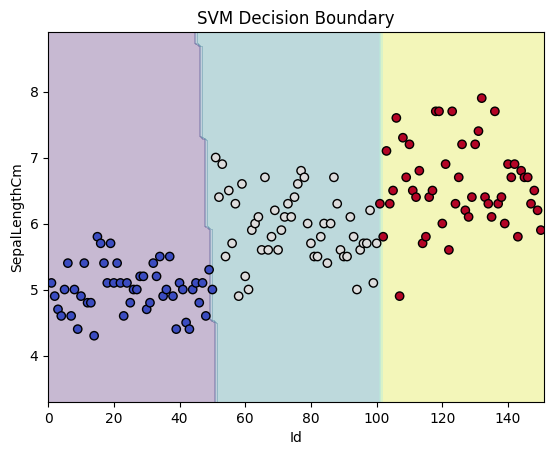

In [ ]:
# Visualize Decision Boundary (Only using first 2 features for visualization)
def plot_decision_boundary(X, y, model):
    X_plot = X.iloc[:, :2].values  # Only take first 2 features for plotting
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create a dataset with all features for prediction
    X_pred = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns[:2])  # Assign column names from X
    X_pred = X_pred.assign(
        **{col: X[col].mean() for col in X.columns[2:]}  # Fill missing features with mean
    )

    Z = model.predict(X_pred)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, svm_model)